Saving Filtered_WWs.xlsx to Filtered_WWs.xlsx
Most important node: 15 product ratings
- Dell Latitude Business 13.3" FHD Core i5 Laptop Windows 11 16GB RAM 256GB SSD


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


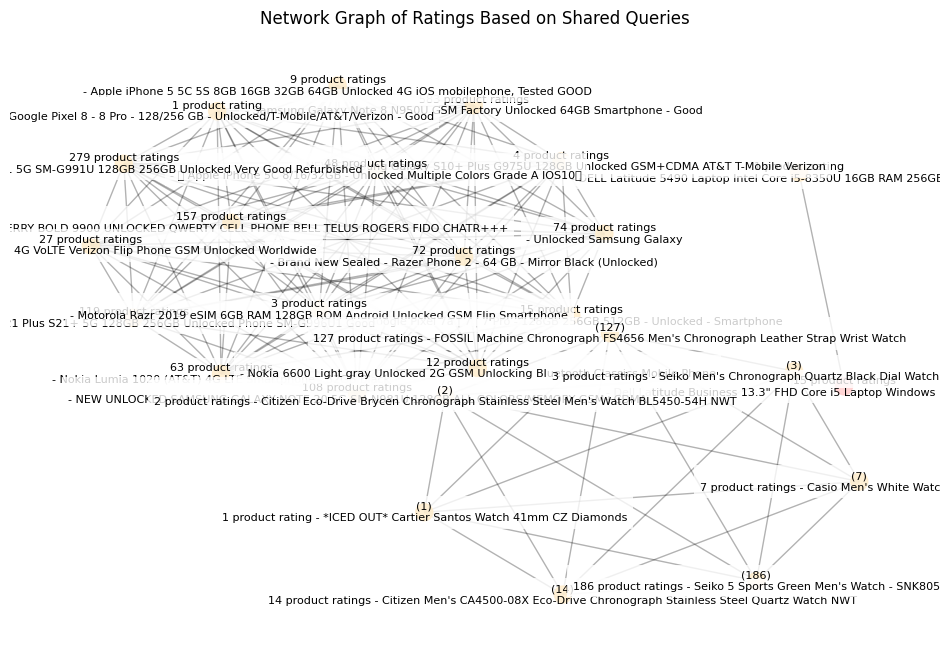

In [28]:
from IPython import get_ipython
from IPython.display import display
!pip install networkx matplotlib pandas

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os
from google.colab import files

if os.path.exists('Filtered_WWs.xlsx'):
    os.remove('Filtered_WWs.xlsx')
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
filtered_df = df[df["Rating"] != "No rating available"]

G = nx.Graph()

rating_counts = filtered_df["Rating"].value_counts()
for rating, count in rating_counts.items():
    G.add_node(rating, size=count)
for query in filtered_df["Query"].unique():
    ratings_in_query = filtered_df[filtered_df["Query"] == query]["Rating"].unique()
    for i in range(len(ratings_in_query)):
        for j in range(i + 1, len(ratings_in_query)):
            G.add_edge(ratings_in_query[i], ratings_in_query[j])
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
most_important_node = max(betweenness_centrality, key=betweenness_centrality.get)
print(f"Most important node:,{most_important_node}")
plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(G, scale=5)
node_sizes = [G.nodes[node]["size"] * 150 for node in G.nodes()]
node_colors = ["red" if node == most_important_node else "orange" for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.3)
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color="black", bbox=dict(facecolor="white", edgecolor='none', alpha=0.8)) # Adjusted font size and added background for better readability

plt.title("Network Graph of Ratings Based on Shared Queries")
plt.axis("off")
plt.show()